# Signal Processing

## Oscillator

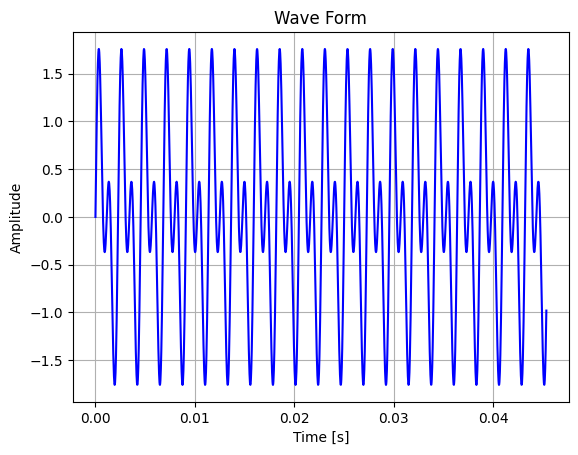

データの型: float64
データの形状: (132300,)


In [ ]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

SAMPLE_RATE = 44100  # Hz

def gent(dur_sec, sample_rate):
    return np.linspace(0, dur_sec, int(dur_sec * sample_rate), endpoint=False)

def sin(t, f):
    return np.sin(2 * np.pi * f * t)

def sqr(t, f):
    return np.sign(np.sin(2 * np.pi * f * t))

def tri(t, f):
    return 2 * np.abs(2 * (t * f % 1) - 1) - 1

def saw(t, f):
    return 2 * (f * t % 1) - 1

def white_noise(t):
    return np.random.uniform(-1, 1, len(t))

class WaveType(Enum):
    SINE = "sine"
    SIN = "sin"
    SQUARE = "square"
    SQR = "sqr"
    TRIANGLE = "triangle"
    TRI = "tri"
    SAW = "saw"
    NOISE = "noise"

class OSC():
    def __init__(self, type, freq_input=0, oct=0, coarse=0, fine=0):
        pass

    def oscillate(self):
        pass

# ----- 時間軸の配列 -----
sample_rate = 44100  # Hz
duration = 1.0  # sec
t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# ----- キホンの波形 -----
f = 440  # Hz
T = 1 / f  # sec
omega = 2 * np.pi * f  # rad / sec

# 正弦波 基音のみ
sine_wave = np.sin(2 * np.pi * f * t)

# 矩形波 全ての奇数次倍音
square_wave = np.sign(sine_wave)

# 三角波 全ての奇数次倍音，矩形波に比べて高い倍音が少ない
triangle_wave = 2 * np.abs(2 * (t * f % 1) - 1) - 1

# ノコギリ波 全ての整数次倍音
saw_wave = 2 * (f * t % 1) - 1

# ホワイトノイズ
wnoise = np.random.uniform(-1, 1, len(t))

# ----- プロットで波形を確認 ------
t = gent(3, 44100)
f = 440
w1 = sin(t, f)
w2 = sin(t, f*2)
wave = w1 + w2
plt.plot(t[:2000], wave[:2000], color='b')
#plt.plot(t[:2000], saw_wave[:2000], color='r')
plt.title('Wave Form')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print(f"データの型: {wave.dtype}")
print(f"データの形状: {wave.shape}")

# ----- 再生 -----
sd.play(wave, sample_rate)
sd.wait()

## Filter

## Envelope Generator

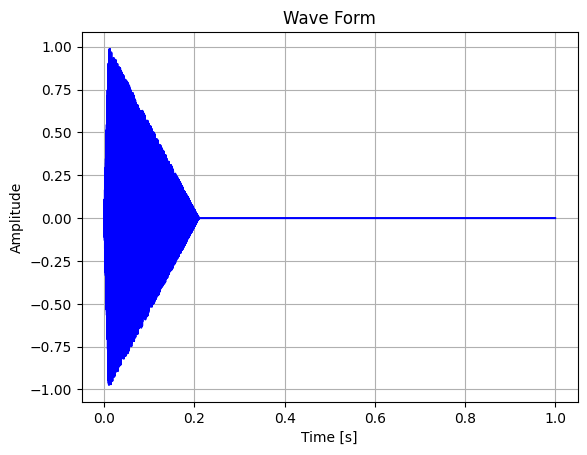

In [10]:
def EG_ADSR(t, sample_rate, attack=0.1, decay=0.2, sustain=0.7, release=0.5):
    env = np.zeros_like(t)
    N = len(t)
    A = int(attack * sample_rate)
    D = int(decay * sample_rate)
    R = int(release * sample_rate)
    S = N - (A + D + R)

    if A > 0:
        env[:A] = np.linspace(0, 1, A)
    if D > 0:
        env[A:A+D] = np.linspace(1, sustain, D)
    if S > 0:
        env[A+D:A+D+S] = sustain
    if R > 0:
        env[A+D+S:] = np.linspace(sustain, 0, R)
    return env

osc = OSC(gent(1, 44100), 440)
wav = osc.noise()
env = EG_ADSR(gent(1, 44100), sample_rate, 0.01, 0.2, 0, 0.01)
wav *= env  # ==== 3. AMP ====

plt.plot(t[::], wav[::], color='b')
#plt.plot(t[:2000], saw_wave[:2000], color='r')
plt.title('Wave Form')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# ==== 4. 出力 ====
sd.play(wav, sample_rate)
sd.wait()
